# Data Analyst - Technical Skills Assessment


In [8]:
#imports and packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

import warnings
warnings.filterwarnings('ignore')

In [9]:
# Set plot style and parameters
plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (12, 8)
plt.rcParams['font.size'] = 12
sns.set_palette("deep")

# 1. Data Handling & Exploration (EDA)

In [ ]:

print("1. Data Handling & Exploration\n" + "="*30)

# Load the dataset
# Replace this with the path to your CSV file
data =  pd.read_excel('/content/Trading Data.xlsx', sheet_name="data")

# Display basic information about the dataset
print("\nDataset Preview:")
print(data.head())

print("\nDataset Information:")
print(data.info())

print("\nDataset Statistics:")
print(data.describe())

# Check for missing values
print("\nMissing Values:")
print(data.isnull().sum())


1. Data Handling & Exploration

Dataset Preview:
      login    ticket  symbol  type            open_time           close_time  \
0  11173702  47345780  XAUUSD   Buy  2024.07.30 11:05:29  2024-07-31 07:58:09   
1  11173702  47718163  XAUUSD   Buy  2024.07.31 09:46:04  2024-07-31 21:42:15   
2  11173702  50360070  XAUUSD  Sell  2024.08.13 13:03:27  2024-08-14 15:24:08   
3  11173702  51120570  XAUUSD   Buy  2024.08.19 13:27:40  2024-08-19 16:37:12   
4  11173702  52180073  XAUUSD  Sell  2024.08.28 02:30:32  2024-08-28 15:29:39   

   open_price  close_price  stop loss  take profit    pips  reason  volume  \
0     2391.28      2420.69    2367.62      2420.64  2936.0       4     190   
1     2421.81      2431.41    2399.23      2431.41   960.0       4     200   
2     2460.93      2472.80    2480.93      2451.37 -1199.0       0     200   
3     2495.80      2485.65    2485.71      2508.16 -1012.0       3     190   
4     2526.53      2496.42    2537.07      2496.82  2971.0       4     189

In [11]:
# Convert date columns to datetime format
data['open_time'] = pd.to_datetime(data['open_time'])
data['close_time'] = pd.to_datetime(data['close_time'])

# Calculate trade duration in hours
data['trade_duration_hours'] = (data['close_time'] - data['open_time']).dt.total_seconds() / 3600
print("\nAdded trade duration in hours")



Added trade duration in hours


In [12]:
# Check for duplicate ticket numbers to check duplicate trades
print("\nDuplicate Ticket Count:", data.duplicated(subset=['ticket']).sum())


Duplicate Ticket Count: 38


In [13]:
# Show only the duplicate rows
duplicate_tickets = data[data.duplicated(subset=['ticket'], keep=False)]
print("\nDuplicate Tickets:")
duplicate_tickets




Duplicate Tickets:


,login,ticket,symbol,type,open_time,close_time,open_price,close_price,stop loss,take profit,pips,reason,volume,profit,trade_duration_hours
886,11210003,57418087,XAUUSD,Buy,2024-11-20 09:59:11,2024-11-20 14:02:12,2622.02000,2629.77000,2622.08000,2635.00000,774.0,16,2,15.48,4.050278
25254,13247024,60737367,HK50,Buy,2024-12-17 04:30:46,1970-01-01 02:00:00,19760.20000,19908.20000,19446.40000,0.00000,14799.0,0,100,190.47,-481778.512778
25255,13247024,60737367,HK50,Buy,2024-12-17 04:30:46,2024-12-24 23:47:40,19760.20000,20124.60000,19446.40000,0.00000,36438.0,2,100,469.06,187.281667
25525,13250310,57418087,NDX100,Sell,2024-12-09 21:19:50,2024-12-10 09:41:30,21469.20000,21442.10000,0.00000,0.00000,2713.0,16,70,189.91,12.361111
36466,13326696,63606984,EURUSD,Sell,2024-12-24 06:15:10,2024-12-24 13:42:02,1.03921,1.03960,1.04151,1.03603,-44.0,0,1000,-440.00,7.447778
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56813,55012315,2596855,GBPJPY,buy,2024-12-23 10:09:47,1970-01-01 00:00:00,196.76700,196.70400,195.70000,205.00000,-6.3,5,100,-40.09,-481930.163056
57144,55012794,2669046,EURUSD,sell,2025-01-17 02:13:42,2025-01-17 02:16:02,1.02990,1.03002,0.00000,0.00000,-1.2,5,300,-36.00,0.038889
57145,55012794,2669046,EURUSD,sell,2025-01-17 02:13:42,1970-01-01 00:00:00,1.02990,1.02993,0.00000,0.00000,-0.3,5,300,-9.00,-482522.228333
57843,55013106,2700481,BTCUSD,buy,2025-01-27 03:04:59,2025-01-27 03:05:04,101944.39000,101917.80000,0.00000,0.00000,-2659.0,0,95,-25.26,0.001389


In [14]:
# Sort by ticket number to see duplicates together
duplicate_tickets_sorted = duplicate_tickets.sort_values(by='ticket')
print("\nDuplicate Tickets (Sorted):")
duplicate_tickets_sorted


Duplicate Tickets (Sorted):


,login,ticket,symbol,type,open_time,close_time,open_price,close_price,stop loss,take profit,pips,reason,volume,profit,trade_duration_hours
54084,55011263,2509920,USDCAD,sell,2024-11-29 17:20:02,2024-12-02 02:04:27,1.40171,1.40201,1.40200,0.00000,-3.0,5,100,-21.40,56.740278
54085,55011263,2509920,USDCAD,sell,2024-11-29 17:20:02,1970-01-01 00:00:00,1.40171,1.40181,0.00000,0.00000,-1.0,5,100,-7.13,-481361.333889
54755,55011432,2583476,US2000,sell,2024-12-18 22:00:00,1970-01-01 00:00:00,2290.10000,2258.90000,2553.30000,1943.70000,312.0,1,7,21.84,-481822.000000
54757,55011432,2583476,US2000,sell,2024-12-18 22:00:00,2024-12-24 23:48:30,2290.10000,2279.80000,2553.30000,1943.70000,103.0,1,7,7.21,145.808333
54756,55011432,2583479,US2000,sell,2024-12-18 22:00:00,1970-01-01 00:00:00,2293.40000,2258.90000,2496.90000,1921.30000,345.0,1,7,24.15,-481822.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,11210003,57418087,XAUUSD,Buy,2024-11-20 09:59:11,2024-11-20 14:02:12,2622.02000,2629.77000,2622.08000,2635.00000,774.0,16,2,15.48,4.050278
25255,13247024,60737367,HK50,Buy,2024-12-17 04:30:46,2024-12-24 23:47:40,19760.20000,20124.60000,19446.40000,0.00000,36438.0,2,100,469.06,187.281667
25254,13247024,60737367,HK50,Buy,2024-12-17 04:30:46,1970-01-01 02:00:00,19760.20000,19908.20000,19446.40000,0.00000,14799.0,0,100,190.47,-481778.512778
36467,13326696,63606984,EURUSD,Sell,2024-12-24 06:15:10,1970-01-01 02:00:00,1.03921,1.03931,1.04198,1.03603,-10.0,0,1000,-100.00,-481948.252778


*Not removing ticket duplications due to trade modification possibility of the used platform.* ❎

## Check data consistency

In [15]:

# verify stop loss and take profit values
print("\nInvestigating data consistency:")
data['stop_loss_check'] = np.where(data['type'] == 'Buy',
                                  data['open_price'] > data['stop loss'],
                                  data['open_price'] < data['stop loss'])
data['take_profit_check'] = np.where(data['type'] == 'Buy',
                                    data['open_price'] < data['take profit'],
                                    data['open_price'] > data['take profit'])

# Count instances where stop loss and take profit do not make logical sense
print("Stop loss inconsistencies:", (~data['stop_loss_check']).sum())
print("Take profit inconsistencies:", (~data['take_profit_check']).sum())



Investigating data consistency:
Stop loss inconsistencies: 21986
Take profit inconsistencies: 17183


fixing inconsistencier of stop loss(SL) and take profit(TP)

In [16]:
# Fix only inconsistent stop loss entries
data.loc[~data['stop_loss_check'], 'stop loss'] = np.where(
    data.loc[~data['stop_loss_check'], 'type'] == 'Buy',
    data.loc[~data['stop_loss_check'], 'open_price'] * 0.95,
    data.loc[~data['stop_loss_check'], 'open_price'] * 1.05
)
# Fix only inconsistent take profit entries
data.loc[~data['take_profit_check'], 'take profit'] = np.where(
    data.loc[~data['take_profit_check'], 'type'] == 'Buy',
    data.loc[~data['take_profit_check'], 'open_price'] * 1.1,
    data.loc[~data['take_profit_check'], 'open_price'] * 0.9
)

# Verify fixes

print("\nInvestigating data consistency:")
data['stop_loss_check'] = np.where(data['type'] == 'Buy',
                                  data['open_price'] > data['stop loss'],
                                  data['open_price'] < data['stop loss'])
data['take_profit_check'] = np.where(data['type'] == 'Buy',
                                    data['open_price'] < data['take profit'],
                                    data['open_price'] > data['take profit'])

print(f"Stop loss inconsistencies after fix: {(~data['stop_loss_check']).sum()}")
print(f"Take profit inconsistencies after fix: {(~data['take_profit_check']).sum()}")


Investigating data consistency:
Stop loss inconsistencies after fix: 0
Take profit inconsistencies after fix: 0


In [17]:
# Check if profit calculation is correct
# For XAUUSD, each pip is worth approximately $0.01 per unit volume
data['calculated_profit'] = data['pips'] * data['volume'] /100.0
data['profit_difference'] = abs(data['calculated_profit'] - data['profit'])

print("\nAverage profit calculation difference:", data[data['symbol'] == 'XAUUSD']['profit_difference'].sum())
print("Max profit calculation difference:", data[data['symbol'] == 'XAUUSD']['profit_difference'].max())



Average profit calculation difference: 0.049999999999272404
Max profit calculation difference: 0.049999999999272404


*Since the profit calculation is consistant for XAUUSD (Gold), and I manually checked all the symbols with most instance, assuming all other profit calculations are correct.* ❎

In [18]:
# Check missing data by column
missing_by_column = data.isnull().sum()
print("\nMissing values by column:")
print(missing_by_column[missing_by_column > 0])


Missing values by column:
Series([], dtype: int64)


In [19]:
# Remove any extreme outliers in the profit column (if necessary)
Q1 = data['profit'].quantile(0.25)
Q3 = data['profit'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 3 * IQR
upper_bound = Q3 + 3 * IQR

print("\nBefore outlier removal:", len(data))
data_cleaned = data[(data['profit'] >= lower_bound) & (data['profit'] <= upper_bound)]
print("After outlier removal:", len(data_cleaned))




Before outlier removal: 59317
After outlier removal: 51196


*Not removing outliers to preserve the actual distribution of returns and actual performence*


In [20]:
data_final = data #Not removing outliers to preserve the actual distribution of returns and actual performence


# 2. Profitability Analysis

In [21]:
print("Profitability Analysis\n" + "="*30)

# Calculate cumulative profit per login
login_profit = data_final.groupby('login')['profit'].sum().reset_index()
# print(login_profit.head())
login_profit.columns = ['login', 'cumulative_profit']
login_profit = login_profit.sort_values('cumulative_profit', ascending=False)

print("\nTop 5 most profitable logins:")
print(login_profit.head())

print("\nBottom 5 least profitable logins:")
print(login_profit.tail())


Profitability Analysis

Top 5 most profitable logins:
        login  cumulative_profit
396  13378390           53891.98
511  55009560           28475.44
50   13088202           27848.61
146  13205503           27049.34
40   13070589           27023.68

Bottom 5 least profitable logins:
        login  cumulative_profit
193  13251499          -11405.24
23   13018096          -12194.31
539  55011482          -12215.00
329  13333728          -13868.00
61   13103928          -14778.82


In [22]:
# Calculate additional profitability metrics per login
profit_metrics = data_final.groupby('login').agg(
    total_trades=('ticket', 'count'),
    win_count=('profit', lambda x: (x > 0).sum()),
    loss_count=('profit', lambda x: (x <= 0).sum()),
    total_profit=('profit', 'sum'),
    avg_profit=('profit', 'mean'),
    max_profit=('profit', 'max'),
    min_profit=('profit', 'min'),
    profit_std=('profit', 'std')
).reset_index()


# Calculate win rate
profit_metrics['win_rate'] = profit_metrics['win_count'] / profit_metrics['total_trades']

print("\nProfitability metrics per login:")
profit_metrics


Profitability metrics per login:


,login,total_trades,win_count,loss_count,total_profit,avg_profit,max_profit,min_profit,profit_std,win_rate
0,11173702,46,22,24,24301.54,528.294348,6231.56,-4050.00,2704.051870,0.478261
1,11178446,174,63,111,-7398.02,-42.517356,536.00,-526.50,101.619448,0.362069
2,11180486,28,17,11,-5104.39,-182.299643,1278.60,-1997.31,761.794730,0.607143
3,11189053,7,4,3,1716.05,245.150000,1976.64,-260.60,769.667503,0.571429
4,11191905,32,15,17,7407.46,231.483125,8344.00,-2488.00,2255.757217,0.468750
...,...,...,...,...,...,...,...,...,...,...
595,55013311,10,6,4,2317.50,231.750000,1269.90,-272.70,531.712615,0.600000
596,55013375,14,8,6,-30.02,-2.144286,666.00,-998.76,390.747485,0.571429
597,2145732203,17,10,7,1883.23,110.778235,913.50,-632.50,417.537786,0.588235
598,2145732335,309,86,223,-4370.11,-14.142751,859.00,-1118.00,144.133823,0.278317


In [23]:
profit_metrics_win_rates = profit_metrics.sort_values('win_rate', ascending=False)

print("\nTop 5 most profitable logins:")
print(profit_metrics_win_rates[['login', 'win_rate']].head())

print("\nBottom 5 least profitable logins:")
print(profit_metrics_win_rates[['login', 'win_rate']].tail())


Top 5 most profitable logins:
        login  win_rate
288  13313450       1.0
463  13410142       1.0
583  55012956       1.0
394  13378192       1.0
326  13333230       1.0

Bottom 5 least profitable logins:
        login  win_rate
16   13003670       0.0
24   13028247       0.0
109  13178595       0.0
354  13350193       0.0
471  13416293       0.0


A composite score could be developed including *rist_adjusted_returns, profit_per_trade* and already used metrics. Using this we would be able to find the most and least proficable traders using a sigle score.

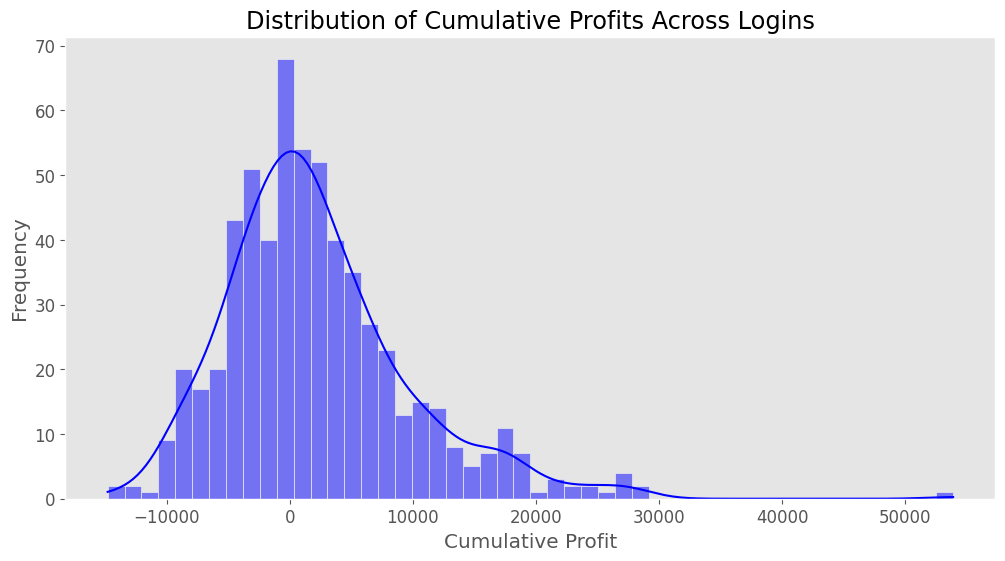

,login,total_trades,win_count,loss_count,total_profit,avg_profit,max_profit,min_profit,profit_std,win_rate,rank
0,11173702,46,22,24,24301.54,528.294348,6231.56,-4050.00,2704.051870,0.478261,9.0
1,11178446,174,63,111,-7398.02,-42.517356,536.00,-526.50,101.619448,0.362069,558.0
2,11180486,28,17,11,-5104.39,-182.299643,1278.60,-1997.31,761.794730,0.607143,526.0
3,11189053,7,4,3,1716.05,245.150000,1976.64,-260.60,769.667503,0.571429,273.0
4,11191905,32,15,17,7407.46,231.483125,8344.00,-2488.00,2255.757217,0.468750,114.0
5,11192001,133,69,64,5820.21,43.760977,1832.65,-1859.47,876.943956,0.518797,147.0
6,11199499,19,9,10,-3523.99,-185.473158,4235.50,-4697.34,3219.568783,0.473684,481.0
7,11201824,112,44,68,17542.78,156.631964,4975.60,-2674.20,1672.327276,0.392857,26.0
8,11202254,124,61,63,11994.05,96.726210,3900.00,-3060.00,1119.022210,0.491935,60.0
9,11205614,1,1,0,93.75,93.750000,93.75,93.75,NaN,1.000000,347.0


,login,total_trades,win_count,loss_count,total_profit,avg_profit,max_profit,min_profit,profit_std,win_rate,rank
590,55013121,81,56,25,1791.12,22.112593,1140.00,-915.00,339.722169,0.691358,268.0
591,55013161,542,375,167,2167.45,3.998985,230.85,-103.28,18.680658,0.691882,255.0
592,55013211,3,1,2,-1910.00,-636.666667,962.00,-1812.00,1434.634913,0.333333,421.0
593,55013245,63,27,36,-1377.55,-21.865873,1350.00,-780.00,260.701608,0.428571,405.0
594,55013306,1,0,1,-7.25,-7.250000,-7.25,-7.25,NaN,0.000000,352.0
595,55013311,10,6,4,2317.50,231.750000,1269.90,-272.70,531.712615,0.600000,247.0
596,55013375,14,8,6,-30.02,-2.144286,666.00,-998.76,390.747485,0.571429,356.0
597,2145732203,17,10,7,1883.23,110.778235,913.50,-632.50,417.537786,0.588235,267.0
598,2145732335,309,86,223,-4370.11,-14.142751,859.00,-1118.00,144.133823,0.278317,507.0
599,2145732336,271,84,187,-4107.15,-15.155535,888.00,-1125.00,149.758882,0.309963,498.0


In [34]:

# Rank logins based on profitability
profit_metrics['rank'] = profit_metrics['total_profit'].rank(ascending=False)

# Visualize the distribution of profits
plt.figure(figsize=(12, 6))
sns.histplot(profit_metrics['total_profit'], bins=50, kde=True, color='blue')
plt.title('Distribution of Cumulative Profits Across Logins')
plt.xlabel('Cumulative Profit')
plt.ylabel('Frequency')
plt.grid()
plt.show()

# Identify most and least profitable logins
most_profitable = profit_metrics.head(10)  # Top 10 profitable logins
least_profitable = profit_metrics.tail(10)  # Bottom 10 unprofitable logins

# Display results
display(most_profitable)
print("="*100)
display(least_profitable)


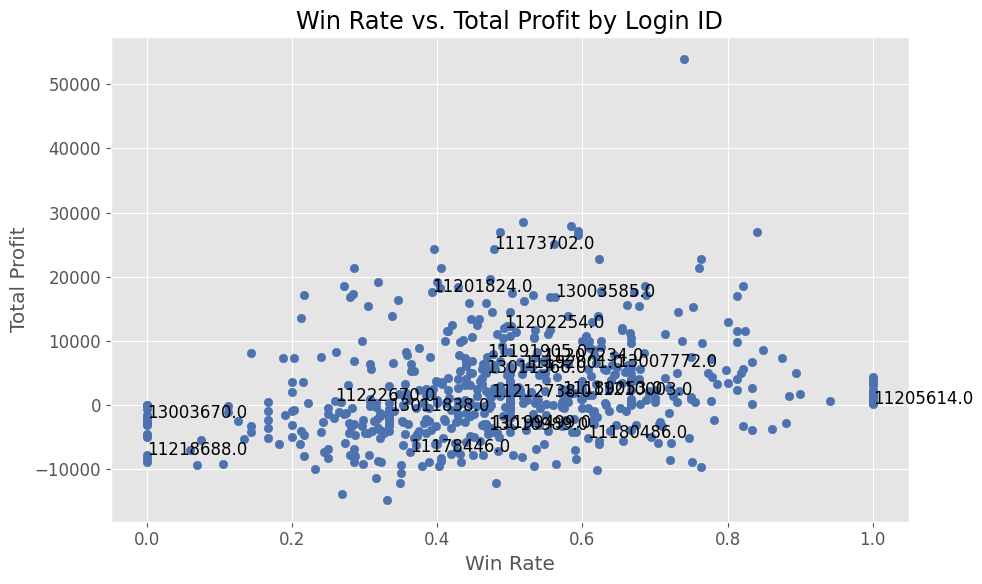

In [27]:
# Plot win rate vs. total profit
plt.figure(figsize=(10, 6))
plt.scatter(profit_metrics['win_rate'], profit_metrics['total_profit'])
for i, row in profit_metrics.iterrows():
    plt.annotate(str(row['login']), (row['win_rate'], row['total_profit']))
    if i == 20:
      break
plt.xlabel('Win Rate')
plt.ylabel('Total Profit')
plt.title('Win Rate vs. Total Profit by Login ID')
plt.grid(True)
plt.tight_layout()
# plt.savefig('winrate_vs_profit.png')
# plt.close()
plt.show()

In [28]:
# Analyze factors contributing to profitability
# Group data by symbol and type
symbol_type_profit = data_final.groupby([ 'symbol']).agg(
    trade_count=('ticket', 'count'),
    avg_profit=('profit', 'mean'),
    total_profit=('profit', 'sum'),
    win_rate=('profit', lambda x: (x > 0).sum() / len(x))
).reset_index()

print("\nProfitability by login, symbol, and trade type:")
symbol_type_profit


Profitability by login, symbol, and trade type:


,symbol,trade_count,avg_profit,total_profit,win_rate
0,ADAUSD,22,-112.274545,-2470.04,0.454545
1,AUDCAD,166,-42.204759,-7005.99,0.481928
2,AUDCHF,85,-11.585059,-984.73,0.352941
3,AUDJPY,353,102.533966,36194.49,0.518414
4,AUDNZD,107,13.842150,1481.11,0.457944
...,...,...,...,...,...
58,XLMUSD,24,12.727917,305.47,0.541667
59,XMRUSD,1,-88.000000,-88.00,0.000000
60,XPTUSD,10,224.776000,2247.76,0.700000
61,XRPUSD,31,102.675161,3182.93,0.419355


In [29]:
# Analyze factors contributing to profitability
# Group data by symbol and type
symbol_type_profit = data_final.groupby([ 'type']).agg(
    trade_count=('ticket', 'count'),
    avg_profit=('profit', 'mean'),
    total_profit=('profit', 'sum'),
).reset_index()

print("\nProfitability by login, symbol, and trade type:")
symbol_type_profit


Profitability by login, symbol, and trade type:


,type,trade_count,avg_profit,total_profit
0,Buy,25647,37.317102,957071.71
1,Sell,21577,9.866018,212879.07
2,buy,7069,30.017601,212194.42
3,sell,5024,-8.203629,-41215.03


# 3. Feature Engineering & Predictive Modeling

In [31]:
print("Feature Engineering & Predictive Modeling\n" + "="*30)

# Creating additional features for each login
# We'll engineer features that might help distinguish profitable traders

# First, create a dataset with one row per login
login_features = profit_metrics[['login', 'total_trades', 'win_rate', 'total_profit', 'avg_profit']].copy()

# Add more features based on trading patterns
trade_patterns = data_final.groupby('login').agg(
    avg_duration=('trade_duration_hours', 'mean'),
    max_duration=('trade_duration_hours', 'max'),
    avg_volume=('volume', 'mean'),
    buy_ratio=('type', lambda x: (x == 'Buy').mean()),
    sell_ratio=('type', lambda x: (x == 'Sell').mean()),
    xauusd_ratio=('symbol', lambda x: (x == 'XAUUSD').mean()), #we can add more symbols if required
    reason_most_common=('reason', lambda x: x.value_counts().index[0]),
    avg_stop_loss_distance=('stop loss', lambda x: abs(x - data_final.loc[x.index, 'open_price']).mean()),
    avg_take_profit_distance=('take profit', lambda x: abs(x - data_final.loc[x.index, 'open_price']).mean()),
    risk_reward_ratio=('stop loss', lambda x: abs(x - data_final.loc[x.index, 'open_price']).mean() /
                       abs(data_final.loc[x.index, 'take profit'] - data_final.loc[x.index, 'open_price']).mean())
)

# Merge the features
login_features = pd.merge(login_features, trade_patterns, on='login')

# variable for profitable traders
login_features['is_profitable'] = login_features['total_profit'] > 0

print("\nEngineered features for each login:")
login_features


Feature Engineering & Predictive Modeling

Engineered features for each login:


,login,total_trades,win_rate,total_profit,avg_profit,avg_duration,max_duration,avg_volume,buy_ratio,sell_ratio,xauusd_ratio,reason_most_common,avg_stop_loss_distance,avg_take_profit_distance,risk_reward_ratio,is_profitable
0,11173702,46,0.478261,24301.54,528.294348,10.161401,74.741944,184.173913,0.565217,0.434783,0.978261,3,188.988163,176.628457,1.069976,True
1,11178446,174,0.362069,-7398.02,-42.517356,3.287385,21.178889,84.620690,0.132184,0.867816,0.471264,3,23.836563,172.405329,0.138259,False
2,11180486,28,0.607143,-5104.39,-182.299643,15.198790,249.515000,233.821429,1.000000,0.000000,0.035714,0,445.424646,2092.602007,0.212857,False
3,11189053,7,0.571429,1716.05,245.150000,0.097341,0.574444,29.285714,0.857143,0.142857,0.000000,0,804.432791,525.533279,1.530698,True
4,11191905,32,0.468750,7407.46,231.483125,1.409193,10.295556,278.187500,0.406250,0.593750,1.000000,1,108.292703,274.796812,0.394083,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
595,55013311,10,0.600000,2317.50,231.750000,-48292.092861,5.227222,90.000000,0.000000,0.000000,1.000000,5,85.283550,2249.797000,0.037907,True
596,55013375,14,0.571429,-30.02,-2.144286,-103480.985595,50.757500,83.285714,0.000000,0.000000,0.214286,5,1754.426616,28921.732203,0.060661,False
597,2145732203,17,0.588235,1883.23,110.778235,3.460931,14.992778,160.588235,0.000000,0.000000,0.058824,0,8.248267,25.000080,0.329930,True
598,2145732335,309,0.278317,-4370.11,-14.142751,-1544.629383,57.281944,14.899676,0.000000,0.000000,0.504854,5,40.739675,71.781766,0.567549,False


In [36]:
# Preprocessing features for modeling
# First, handle missing values
login_features.fillna(0, inplace=True)

# Select features and target
X = login_features.drop(['login', 'total_profit', 'is_profitable'], axis=1)
y = login_features['is_profitable']

# Scale numerical features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled = pd.DataFrame(X_scaled, columns=X.columns)

print("\nPreprocessed features for modeling:")
X_scaled.head()


Preprocessed features for modeling:


,total_trades,win_rate,avg_profit,avg_duration,max_duration,avg_volume,buy_ratio,sell_ratio,xauusd_ratio,reason_most_common,avg_stop_loss_distance,avg_take_profit_distance,risk_reward_ratio
0,-0.295695,-0.061052,0.870668,0.219820,0.071653,-0.142527,0.423349,0.195366,1.272796,-0.521724,-0.242433,-0.341767,-0.152469
1,0.420305,-0.642289,-0.260143,0.219680,0.070080,-0.271032,-1.048873,1.767538,0.057114,-0.521724,-0.279736,-0.342502,-0.272033
2,-0.396383,0.583665,-0.537060,0.219922,0.076783,-0.078442,1.901518,-1.383156,-0.987253,-0.984564,-0.184512,-0.007959,-0.262460
3,-0.513852,0.405008,0.309742,0.219615,0.069476,-0.342459,1.415834,-0.864498,-1.072889,-0.984564,-0.103422,-0.280979,-0.093346
4,-0.374008,-0.108629,0.282668,0.219642,0.069761,-0.021174,-0.117106,0.772514,1.324923,-0.830284,-0.260660,-0.324663,-0.239204


In [37]:
# Split data for training and testing
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

# Train Random Forest classifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Make predictions
y_pred = rf_model.predict(X_test)

# Evaluate model performance
print("\nModel Performance:")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))



Model Performance:
Accuracy: 0.9944444444444445

Classification Report:
              precision    recall  f1-score   support

       False       1.00      0.99      0.99        83
        True       0.99      1.00      0.99        97

    accuracy                           0.99       180
   macro avg       0.99      0.99      0.99       180
weighted avg       0.99      0.99      0.99       180



In [38]:

# Feature importance
feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': rf_model.feature_importances_
}).sort_values('Importance', ascending=False)

print("\nFeature Importance:")
print(feature_importance)



Feature Importance:
                     Feature  Importance
2                 avg_profit    0.721974
1                   win_rate    0.087189
5                 avg_volume    0.027031
3               avg_duration    0.020288
10    avg_stop_loss_distance    0.019891
12         risk_reward_ratio    0.019754
11  avg_take_profit_distance    0.017050
0               total_trades    0.017038
4               max_duration    0.016771
7                 sell_ratio    0.016125
8               xauusd_ratio    0.013975
6                  buy_ratio    0.013085
9         reason_most_common    0.009828


In [39]:

# Validate model predictions against cumulative profit
# Apply the model to all logins
all_predictions = rf_model.predict(X_scaled)
login_features['predicted_profitable'] = all_predictions

# Check alignment with actual profitability
validation = login_features[['login', 'total_profit', 'is_profitable', 'predicted_profitable']]
validation['prediction_correct'] = validation['is_profitable'] == validation['predicted_profitable']

print("\nModel Validation:")
print(validation)
print("\nPrediction Accuracy:", validation['prediction_correct'].mean())


Model Validation:
          login  total_profit  is_profitable  predicted_profitable  \
0      11173702      24301.54           True                  True   
1      11178446      -7398.02          False                 False   
2      11180486      -5104.39          False                 False   
3      11189053       1716.05           True                  True   
4      11191905       7407.46           True                  True   
..          ...           ...            ...                   ...   
595    55013311       2317.50           True                  True   
596    55013375        -30.02          False                 False   
597  2145732203       1883.23           True                  True   
598  2145732335      -4370.11          False                 False   
599  2145732336      -4107.15          False                 False   

     prediction_correct  
0                  True  
1                  True  
2                  True  
3                  True  
4         

# 4. Clustering & Trader Segmentation

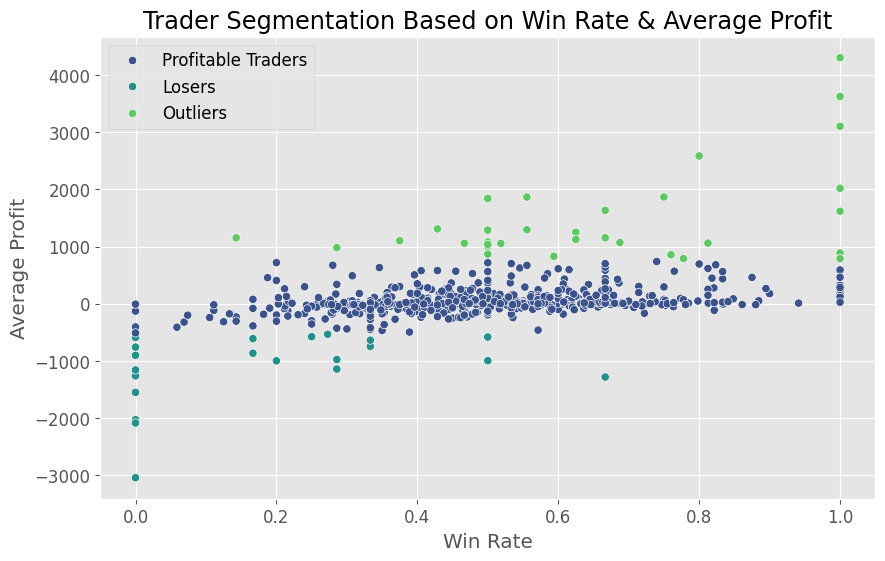

                    count         mean         std          min          25%  \
segment                                                                        
Losers               23.0 -1101.094159  601.021274 -3042.300000 -1247.750357   
Outliers             34.0  1481.289464  826.620306   787.740000  1010.734375   
Profitable Traders  543.0    52.007606  206.712737  -510.033333   -45.406607   

                            50%          75%          max  
segment                                                    
Losers              -974.857143  -691.183333  -534.034545  
Outliers            1138.847143  1787.937500  4302.000000  
Profitable Traders    15.085556   121.229091   738.246301  


In [47]:

#  Apply Clustering (K-Means) to segment traders
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
login_features['cluster'] = kmeans.fit_predict(login_features[['win_rate', 'avg_profit']])

# Label Clusters
cluster_labels = {0: 'Losers', 1: 'Profitable Traders', 2: 'Outliers'}
login_features['segment'] = login_features['cluster'].map(cluster_labels)

# Verify classifications
verification = login_features.groupby('segment')['avg_profit'].describe()

# Visualize Clustering Results
plt.figure(figsize=(10, 6))
sns.scatterplot(data=login_features, x='win_rate', y='avg_profit', hue='segment', palette='viridis')
plt.title('Trader Segmentation Based on Win Rate & Average Profit')
plt.xlabel('Win Rate')
plt.ylabel('Average Profit')
plt.legend()
plt.grid(True)
plt.show()

# Display cluster verification
print(verification)

In [51]:
!pip freeze > requirements.txt